In [ ]:
!pip install awscli
!aws configure

In [ ]:
# Download data from S3.
# This will stay on this machine only as long as the session is active, and will be deleted afterwards.
!aws s3 cp --recursive s3://uoftremmiedata/diagnosis_images ./data

In [ ]:
import cv2
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import json
import shutil
import os
import pandas as pd

In [ ]:
path = [r"/content/data/AOM",
        r"/content/data/ASOM",
        r"/content/data/CSOM",
        r"/content/data/Abnormal_Pinna",
        r"/content/data/Diminished_Hearing",
        r"/content/data/Foreign_Body",
        r"/content/data/Fungal_Infection",
        r"/content/data/Impacted_Wax",
        r"/content/data/Inflammation_of_Pinna",
        r"/content/data/Normal",
        r"/content/data/Nose_Throat Disorders",
        r"/content/data/OME_(Serous_OM)",
        r"/content/data/Otitis_Externa",
        r"/content/data/Tinnitus",
        ]

In [ ]:
# number of data points that do not have om
counts = {}
master_len = 0
for p in path:
  count= 0
  topic = p.split('/')[-1]

  for root_dir, cur_dir, files in os.walk(p):
      count += len(files)
  master_len += count
  counts[topic] = count

print (master_len)
for key in counts.keys():
  print(key +' number of images:', counts[key], 'percentage: ',  round(counts[key]/ master_len*100,2))


3008
AOM number of images: 247 percentage:  8.21
ASOM number of images: 248 percentage:  8.24
CSOM number of images: 246 percentage:  8.18
Abnormal_Pinna number of images: 59 percentage:  1.96
Diminished_Hearing number of images: 180 percentage:  5.98
Foreign_Body number of images: 249 percentage:  8.28
Fungal_Infection number of images: 250 percentage:  8.31
Impacted_Wax number of images: 250 percentage:  8.31
Inflammation_of_Pinna number of images: 223 percentage:  7.41
Normal number of images: 250 percentage:  8.31
Nose_Throat Disorders number of images: 58 percentage:  1.93
OME_(Serous_OM) number of images: 250 percentage:  8.31
Otitis_Externa number of images: 249 percentage:  8.28
Tinnitus number of images: 249 percentage:  8.28


In [ ]:
from tensorflow.keras.utils  import load_img
from tensorflow.keras.utils  import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50

# load the model
model = ResNet50()
# load an image from file
image = load_img('/content/data/OM/6317055695d1340074ccee1a_9a72eddb9f134a7485b80b30_Right Ear.jpeg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


102967424/102967424 [==============================] - 5s 0us/step


FileNotFoundError: ignored

In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
import math

path = '/content/data'

train_datagen = ImageDataGenerator(rescale=1./255,

    zoom_range=0.2,



    validation_split=0.2) # set validation split

train = train_datagen.flow_from_directory(
    path,
    target_size=(150,200),

    class_mode='categorical',
    subset='training') # set as training data

test = train_datagen.flow_from_directory(
    path, # same directory as training data
    target_size=(150,200),

    class_mode='categorical',
    subset='validation') # set as validation data


Found 3093 images belonging to 15 classes.
Found 767 images belonging to 15 classes.


In [ ]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 150, 200, 3)
Batch Size for Output Image :  (32, 15)
Image Size of first image :  (150, 200, 3)
Output of first image :  (15,)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

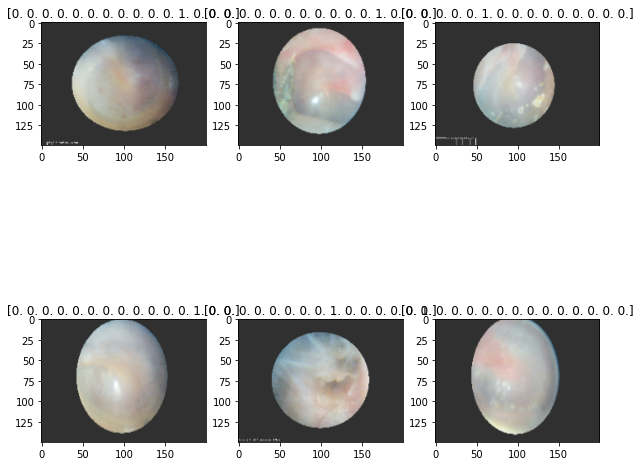

In [ ]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [ ]:
def AlexNet(input_shape):

    X_input = Input(input_shape)



    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)

    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)

    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)

    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)

    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)

    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)

    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)

    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)

    X = Flatten()(X)

    X = Dense(4096, activation = 'relu', name = "fc0")(X)

    X = Dense(4096, activation = 'relu', name = 'fc1')(X)

    X = Dense(2,activation='softmax',name = 'fc2')(X)

    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [ ]:
alex = AlexNet(train[0][0].shape[1:])

In [ ]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 200, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 35, 48, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 35, 48, 96)        384       
                                                                 
 activation (Activation)     (None, 35, 48, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 17, 23, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 17, 23, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 17, 23, 256)       1024

In [ ]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
alex.fit_generator(train,epochs=30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/30
55/55 [==============================] - 88s 2s/step - loss: 3.9422 - accuracy: 0.5414
Epoch 2/30
55/55 [==============================] - 89s 2s/step - loss: 0.6914 - accuracy: 0.5499
Epoch 3/30
55/55 [==============================] - 87s 2s/step - loss: 0.6473 - accuracy: 0.6035
Epoch 4/30
55/55 [==============================] - 87s 2s/step - loss: 0.6273 - accuracy: 0.6418
Epoch 5/30
55/55 [==============================] - 86s 2s/step - loss: 0.6115 - accuracy: 0.6475
Epoch 6/30
55/55 [==============================] - 88s 2s/step - loss: 0.5945 - accuracy: 0.6651
Epoch 7/30
55/55 [==============================] - 86s 2s/step - loss: 0.5928 - accuracy: 0.6594
Epoch 8/30
55/55 [==============================] - 87s 2s/step - loss: 0.5991 - accuracy: 0.6674
Epoch 9/30
55/55 [==============================] - 86s 2s/step - loss: 0.5965 - accuracy: 0.6640
Epoch 10/30
55/55 [==============================] - 87s 2s/step - loss: 0.5901 - accuracy: 0.6828
Epoch 11/30
55/55 [

In [ ]:
import os
def get_category(predicted_output):
    path = '/content/data'
    return os.listdir(path)[np.argmax(predicted_output)]

In [ ]:
preds = alex.evaluate_generator(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Not_OM')

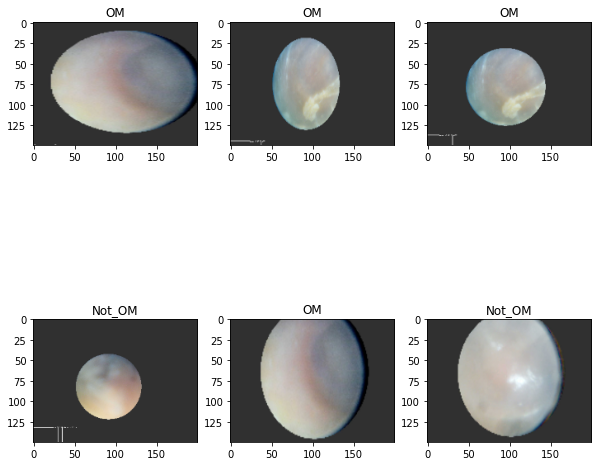

In [ ]:
predictions = alex.predict_generator(test)
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(test[10][0][0])
axs[0][0].set_title(get_category(predictions[10]))
axs[0][1].imshow(test[13][0][0])
axs[0][1].set_title(get_category(predictions[13]))
axs[0][2].imshow(test[13][0][0])
axs[0][2].set_title(get_category(predictions[13]))
axs[1][0].imshow(test[1][0][0])
axs[1][0].set_title(get_category(predictions[1]))
axs[1][1].imshow(test[10][0][0])
axs[1][1].set_title(get_category(predictions[10]))
axs[1][2].imshow(test[12][0][0])
axs[1][2].set_title(get_category(predictions[12]))

In [ ]:
test

In [ ]:
from distutils.dir_util import copy_tree
import os

os.mkdir("/content/data/OM")
os.mkdir("/content/data/Not_OM")


copy_tree("/content/data/OME_(Serous_OM)","/content/data/OM")
copy_tree("/content/data/AOM","/content/data/OM")
copy_tree("/content/data/ASOM","/content/data/OM")
copy_tree("/content/data/CSOM","/content/data/OM")

FileExistsError: ignored

In [ ]:
copy_tree("/content/data/Abnormal_Pinna","/content/data/Not_OM")
copy_tree("/content/data/Foreign_Body","/content/data/Not_OM")
copy_tree("/content/data/Fungal_Infection","/content/data/Not_OM")
copy_tree("/content/data/Impacted_Wax","/content/data/Not_OM")
copy_tree("/content/data/Inflammation_of_Pinna","/content/data/Not_OM")
copy_tree("/content/data/Nose_Throat Disorders","/content/data/Not_OM")
copy_tree("/content/data/Otitis_Externa","/content/data/Not_OM")

['/content/data/Not_OM/62178e86531a5d0082275498_bcdadeee6d9a4a9d9caee952_Left Ear.jpeg',
 '/content/data/Not_OM/6283bcc393a56800382b307e_78b63cf3de2241148db8e4b3_Right Ear.jpeg',
 '/content/data/Not_OM/62d305a4fda13900748fba57_7c3f1181faab49858e8e6fa6_Right Ear.jpeg',
 '/content/data/Not_OM/6136e70ef49965001dbb3392_a18a3c0b16ac441cbc68b9b7_Right Ear.jpeg',
 '/content/data/Not_OM/6324239890294e00bfde8da7_c3ca5af1798f45d684a15ee1_Right Ear.jpeg',
 '/content/data/Not_OM/62e39ee387c65200b47af0a6_ffc32508d48b40e9a7066c74_Left Ear.jpeg',
 '/content/data/Not_OM/63100c3d877163003836e096_4987b7d1fa6c4b9d83314193_Left Ear.jpeg',
 '/content/data/Not_OM/6306448f888482001fc6a087_683b8b0db0824af6868480a0_Right Ear.jpeg',
 '/content/data/Not_OM/63100ae8bdbbf200267e0c07_a17c0ecef497457ab3407b54_Left Ear.jpeg',
 '/content/data/Not_OM/62301fce451cb4001ec815bb_978b14138695461ea0b3d73a_Right Ear.jpeg',
 '/content/data/Not_OM/62d6a0af40ca97001fdb8345_cfa14dfa06ce473db392cb67_Right Ear.jpeg',
 '/content/dat

In [ ]:
import shutil
shutil.rmtree('/content/data/Diminished_Hearing')
shutil.rmtree('/content/data/Tinnitus')
shutil.rmtree('/content/data/OME_(Serous_OM)')
shutil.rmtree('/content/data/AOM')
shutil.rmtree('/content/data/ASOM')
shutil.rmtree('/content/data/CSOM')


In [ ]:
shutil.rmtree('/content/data/Abnormal_Pinna')
shutil.rmtree('/content/data/Foreign_Body')
shutil.rmtree('/content/data/Fungal_Infection')
shutil.rmtree('/content/data/Impacted_Wax')
shutil.rmtree('/content/data/Inflammation_of_Pinna')
shutil.rmtree('/content/data/Nose_Throat Disorders')
shutil.rmtree('/content/data/Otitis_Externa')